<a href="https://colab.research.google.com/github/eworlu/learn/blob/main/Song_Mood_Analyzer_using_Lyrics_and_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**🎵 Song Mood Analyzer using Lyrics and AI**

Welcome to the **Song Mood Analyzer**!  
This fun project allows you to input song lyrics and uses Natural Language Processing (NLP) to analyze the sentiment and emotional tone behind the words.

### 🔍 What this notebook will do:
- Accept user input (song lyrics)
- Analyze sentiment (e.g., positive, negative, neutral)

> Add blockquote


- Generate a word cloud of common words
- Plot emotion scores using bar charts

We'll build this step by step, starting with installing the necessary libraries.

---


In [11]:
# Install required packages (you can uncomment if not already installed)
!pip install textblob
!pip install wordcloud
!pip install matplotlib
!pip install seaborn
!pip install nltk
!pip install nrclex

# Download NLTK data (needed for some NLP tasks)
import nltk
nltk.download('punkt')

nltk.download('punkt_tab')


from nrclex import NRCLex
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## ✍️ Step 2: Input Lyrics and Preprocess

In this step, we'll provide a space to enter the song lyrics.  
We'll also perform basic text cleaning such as:
- Lowercasing
- Removing punctuation
- Tokenization (splitting the text into words)

These steps help prepare the text for sentiment and emotion analysis.
---


In [12]:
# Get song lyrics input from the user
lyrics = input("🎤 Please enter the song lyrics here:\n\n")

# Print the raw lyrics (optional)
print("\n📝 Raw Lyrics:\n")
print(lyrics)

🎤 Please enter the song lyrics here:

Song title: See you through  Chorus I know, I know He'll see me through I know, I know He'll be there for me  I just got to push, I just got to press,  I just got to keep on moving I know, I know He'll see me through  Verse You are there, even when I can't feel it You are there, holding my hands You were there even though I can't see it You’ve been always there when I needed you the most  Chorus: It's gonna be okay, it's gonna be fine It's gonna be okay, it's gonna be fine  Verse Lead me not to temptation, deliver me from all evil, give me this day my daily bread  Help me Lord to forgive others, as you too has forgiven me thine Is the Kingdom forevermore  Chorus  It's gonna be okay it's gonna be fine It's gonna be okay it's gonna be fine  Outro  It's gonna be okay it's gonna be fine It's gonna be okay it's gonna be fine

📝 Raw Lyrics:

Song title: See you through  Chorus I know, I know He'll see me through I know, I know He'll be there for me  I ju

In [13]:
# Clean and preprocess
import re

def clean_text(text):
    # Lowercase, remove special characters and extra spaces
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)  # remove text in brackets
    text = re.sub(r'http\S+|www\S+', '', text)  # remove URLs
    text = re.sub(r'<.*?>+', '', text)  # remove HTML tags
    text = re.sub(r'[^a-z\s]', '', text)  # remove non-alphabetic characters
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces
    return text

cleaned_lyrics = clean_text(lyrics)

print("🧼 Cleaned Lyrics:\n")
print(cleaned_lyrics)


🧼 Cleaned Lyrics:

song title see you through chorus i know i know hell see me through i know i know hell be there for me i just got to push i just got to press i just got to keep on moving i know i know hell see me through verse you are there even when i cant feel it you are there holding my hands you were there even though i cant see it youve been always there when i needed you the most chorus its gonna be okay its gonna be fine its gonna be okay its gonna be fine verse lead me not to temptation deliver me from all evil give me this day my daily bread help me lord to forgive others as you too has forgiven me thine is the kingdom forevermore chorus its gonna be okay its gonna be fine its gonna be okay its gonna be fine outro its gonna be okay its gonna be fine its gonna be okay its gonna be fine


# 💬 Step 3: Sentiment Analysis

Now that we've cleaned the lyrics, let’s analyze the overall sentiment using `TextBlob`.

TextBlob helps us calculate:
- **Polarity**: ranges from -1 (negative) to 1 (positive)
- **Subjectivity**: ranges from 0 (objective) to 1 (subjective)

This gives us a basic emotional tone of the lyrics.


In [14]:
from textblob import TextBlob

# Create a TextBlob object
blob = TextBlob(cleaned_lyrics)

# Get sentiment metrics
polarity = blob.sentiment.polarity
subjectivity = blob.sentiment.subjectivity

# Interpret the polarity score
if polarity > 0:
    sentiment = "Positive 😊"
elif polarity < 0:
    sentiment = "Negative 😢"
else:
    sentiment = "Neutral 😐"

print(f"🧠 Sentiment Analysis:\n")
print(f"Polarity Score: {polarity:.2f}")
print(f"Subjectivity Score: {subjectivity:.2f}")
print(f"Overall Sentiment: {sentiment}")


🧠 Sentiment Analysis:

Polarity Score: 0.33
Subjectivity Score: 0.50
Overall Sentiment: Positive 😊


# ☁️ Step 4: Word Cloud Visualization

Let’s visualize the most common words in the lyrics using a word cloud!

This gives us an artistic view of the lyrics’ vocabulary. The bigger the word, the more frequently it appears.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127926 (\N{MULTIPLE MUSICAL NOTES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


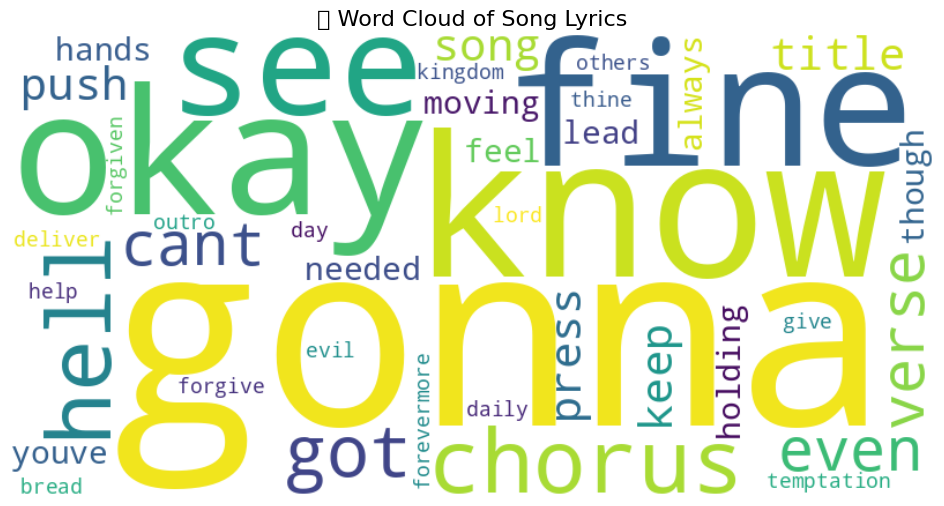

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_lyrics)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("🎶 Word Cloud of Song Lyrics", fontsize=16)
plt.show()


# 😃 Step 5: Emotion Detection & Bar Chart

We’ll use the `NRCLex` library to detect emotions such as:
- Joy, Anger, Sadness, Fear, Surprise, Trust, Disgust, Anticipation

After identifying the emotions, we’ll display them in a bar chart to show the emotional distribution of the song lyrics.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


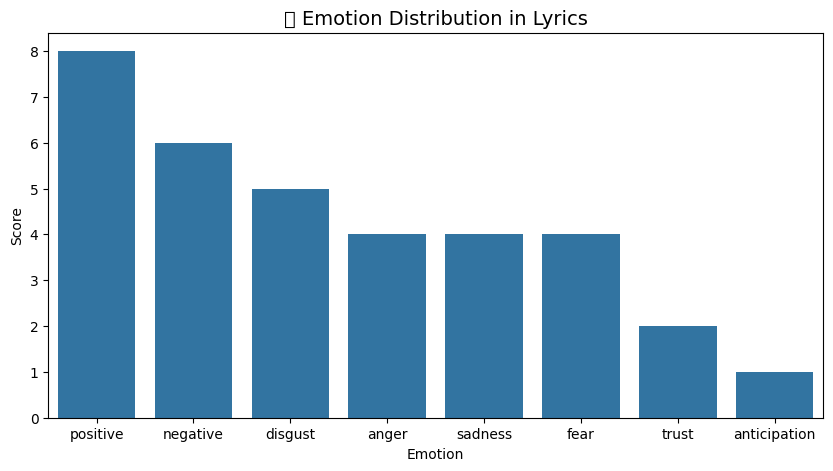

In [16]:
# Analyze emotions in lyrics
emotion_obj = NRCLex(cleaned_lyrics)
emotion_scores = emotion_obj.raw_emotion_scores

# Convert to DataFrame
emotion_df = pd.DataFrame(list(emotion_scores.items()), columns=['Emotion', 'Score'])
emotion_df.sort_values(by='Score', ascending=False, inplace=True)

# Plot the emotions
plt.figure(figsize=(10, 5))
sns.barplot(data=emotion_df, x='Emotion', y='Score')
plt.title("🎭 Emotion Distribution in Lyrics", fontsize=14)
plt.xlabel("Emotion")
plt.ylabel("Score")
plt.show()